# **Pittsburgh Neighborhood Parks Analysis**

*CMPINF 0010 Spring 2022 Final Project* \
*Braedon Ondos*

# Introduction

We are performing a data-driven analysis to find the best neighborhood in Pittsburgh in terms of environmental quality. We are doing this by using datasets from the Western Pennsylvania Regional Data Center (WPRDC). 

# Parks

My own submetric is parks in Pittsburgh. In my analysis, the number, density, and quality of parks is used to determinine the best neighborhood in Pittsburgh. [The Parks dataset](https://data.wprdc.org/dataset/parks/resource/fa329e3d-89ff-4708-8ddf-81bfedcad11d), [the neighborhood areas dataset](https://data.wprdc.org/dataset/neighborhoods2), and the neighborhood populations dataset were obtained from the Western Pennsylvania Regional Data Center.

In [72]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [73]:
parks = pd.read_csv("Parks.csv")
parks.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


In [74]:
neighborhoods = parks["neighborhood"].unique()
print(neighborhoods)

['Beechview' 'Crawford-Roberts' 'North Shore' 'Allegheny Center'
 'Central Business District' 'Central Northside' 'East Liberty'
 'Bedford Dwellings' 'South Side Slopes' 'South Side Flats'
 'Lower Lawrenceville' 'Banksville' 'South Oakland' 'Homewood North'
 'Hazelwood' 'Bon Air' 'Central Oakland' 'Brighton Heights' 'Brookline'
 'Spring Garden' 'Lincoln-Lemington-Belmar' 'Windgap' 'Troy Hill'
 'Westwood' 'Perry South' 'Homewood West' 'Squirrel Hill South'
 'Strip District' 'Arlington' 'Stanton Heights' 'Crafton Heights'
 'Upper Lawrenceville' 'East Carnegie' 'East Hills' 'Point Breeze'
 'Allentown' 'Duquesne Heights' 'Mount Washington' 'Esplen' 'Fairywood'
 'Fineview' 'Garfield' 'Greenfield' 'Larimer' 'Bloomfield' 'Perry North'
 'North Oakland' 'Hays' 'Elliott' 'Highland Park' 'Homewood South'
 'Morningside' 'Terrace Village' 'Spring Hill-City View' 'Carrick'
 'Central Lawrenceville' 'Lincoln Place' 'Manchester' 'Marshall-Shadeland'
 'Sheraden' 'Beltzhoover' 'Point Breeze North' 'Oakwo

In [75]:
print("There are " + str(parks["name"].size) + " parks listed in the dataset.")
print("There are " + str(len(neighborhoods)) + " neighborhoods listed in the Parks dataset.")
nbhdList = pd.read_csv("NeighborhoodList.csv")
print("There are a total of " + str(len(nbhdList["hood"])) + " neighborhoods in Pittsburgh.")

There are 209 parks listed in the dataset.
There are 73 neighborhoods listed in the Parks dataset.
There are a total of 90 neighborhoods in Pittsburgh.


Some of the entries in the Parks dataset are not actually parks. Some are listed as a traffic island, median, or building grounds. Since we are focusing on the environment, we only want to look at parks because they are outdoor spaces.

In [76]:
parks = parks[parks.type == "Park"]
print("There are 209 entires in the dataset, but " + str(len(parks.index)) + " of them are just parks.")

There are 209 entires in the dataset, but 153 of them are just parks.


In [77]:
parkCount = parks.groupby(by = "neighborhood").count()
parkCount = parkCount["id"].sort_values(ascending = False)
parkCount = parkCount.rename("parkCount")
parkCount

neighborhood
South Side Slopes    6
Beechview            6
Mount Washington     5
Hazelwood            5
Troy Hill            5
                    ..
Homewood West        1
Middle Hill          1
Morningside          1
New Homestead        1
Windgap              1
Name: parkCount, Length: 71, dtype: int64

Text(0, 0.5, 'Number of Parks')

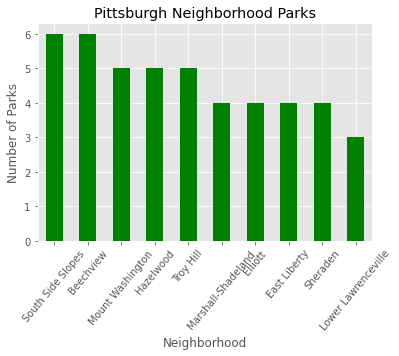

In [78]:
plt.style.use('ggplot')
parkCount.head(10).plot.bar(rot=50, color = "Green")
plt.title("Pittsburgh Neighborhood Parks")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Parks")

This is a graph of the top 10 Pittsburgh neighborhoods with the most parks. Now let's consider the density of the parks 
per total area of the neighborhood.

# Park Density by Area

In [79]:
areas = pd.read_csv("NeighborhoodList.csv")
areas = areas[["hood","acres"]]
areas = areas.rename(columns={"hood":"Neighborhood","acres":"Acres"})
areas.head(5)

,Neighborhood,Acres
0,Chateau,246.501
1,Summer Hill,282.104
2,Northview Heights,201.558
3,Spring Hill-City View,404.765
4,Perry South,581.656


In [80]:
areas = areas.sort_values('Neighborhood')
areas.head(5)

,Neighborhood,Acres
13,Allegheny Center,134.703
11,Allegheny West,90.841
62,Allentown,189.608
67,Arlington,302.320
71,Arlington Heights,84.592


In [81]:
parkCount = pd.DataFrame(parkCount)
parkCount = parkCount.sort_values(by="neighborhood")
parkCount.head(5)

,parkCount
neighborhood,
Allegheny Center,2
Allentown,2
Arlington,1
Banksville,2
Bedford Dwellings,1


In [82]:
parkCountArea = parkCount.merge(areas,how='inner',left_on="neighborhood",right_on="Neighborhood")
columns_titles = ["Neighborhood","parkCount","Acres"]
parkCountArea = parkCountArea.reindex(columns=columns_titles)
print(parkCountArea[parkCountArea["Neighborhood"]=="Perry North"].index.values)
parkCountArea.iat[48,2] = 700
parkCountArea.head(5)

[47]


,Neighborhood,parkCount,Acres
0,Allegheny Center,2,134.703
1,Allentown,2,189.608
2,Arlington,1,302.320
3,Banksville,2,622.919
4,Bedford Dwellings,1,115.252


Perry North did not contain an acreage in the dataset. It looks roughly the same size as Brighton Heights, which is 718 acres. I will assign an estimate of 700 acres to Perry North. Since it will end up towards the bottom of our ranking list, the exact acreage is not needed.

In [83]:
parkCountArea["Parks per Acre"] = parkCountArea['parkCount']/parkCountArea['Acres']
parkCountArea.head(5)

,Neighborhood,parkCount,Acres,Parks per Acre
0,Allegheny Center,2,134.703,0.014847
1,Allentown,2,189.608,0.010548
2,Arlington,1,302.320,0.003308
3,Banksville,2,622.919,0.003211
4,Bedford Dwellings,1,115.252,0.008677


In [84]:
parkCountArea = parkCountArea.sort_values("Parks per Acre",ascending = False)
parkCountArea['Rank'] = np.arange(len(parkCountArea))
parkCountArea.head(10)

,Neighborhood,parkCount,Acres,Parks per Acre,Rank
47,Perry North,2,0.000,inf,0
40,Marshall-Shadeland,4,148.209,0.026989,1
64,Troy Hill,5,247.170,0.020229,2
18,Crawford-Roberts,3,166.101,0.018061,3
39,Manchester,3,179.566,0.016707,4
45,North Shore,3,195.014,0.015384,5
0,Allegheny Center,2,134.703,0.014847,6
55,South Side Slopes,6,460.632,0.013026,7
26,Fineview,2,160.488,0.012462,8
15,Central Northside,2,166.475,0.012014,9


Text(0, 0.5, 'Number of Parks per Acre')

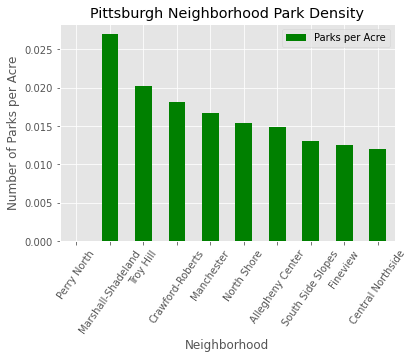

In [85]:
plt.style.use('ggplot')
parkCountArea[["Neighborhood","Parks per Acre"]].head(10).plot.bar(rot=55, color = "Green",x='Neighborhood',y="Parks per Acre")
plt.title("Pittsburgh Neighborhood Park Density")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Parks per Acre")

Here are the top ten neighborhoods in parks per acre density. This means these neighborhoods have the most parks compared to their size, so it will take less distance to visit them. Having more parks per acre means there is more area reserved for outdoor spaces compared to roads and buildings. This contributes to the neighborhood having a higher quality environment.

# Parks Density by Population

In [86]:
pops = pd.read_csv("NeighborhoodPopulations.csv")
pops = pops[["Neighborhood","2020_Total_Population"]]
pops.head(5)

,Neighborhood,2020_Total_Population
0,Allegheny Center,1419
1,Allegheny West,540
2,Allentown,2305
3,Arlington - Arlington Heights (Combined),2040
4,Banksville,4127


In [87]:
pops = pops.sort_values('Neighborhood')
parkCount = pd.DataFrame(parkCount)
parkCount = parkCount.sort_values(by="neighborhood")
parkCountPop = parkCount.merge(pops,how='inner',left_on="neighborhood",right_on="Neighborhood")
columns_titles = ["Neighborhood","parkCount","2020_Total_Population"]
parkCountPop = parkCountPop.reindex(columns=columns_titles)
parkCountPop.head(5)

,Neighborhood,parkCount,2020_Total_Population
0,Allegheny Center,2,1419
1,Allentown,2,2305
2,Banksville,2,4127
3,Bedford Dwellings,1,1386
4,Beechview,6,7596


In [88]:
parkCountPop["Parks per Person"] = parkCountPop['parkCount']/parkCountPop['2020_Total_Population']
parkCountPop.head(5)

,Neighborhood,parkCount,2020_Total_Population,Parks per Person
0,Allegheny Center,2,1419,0.001409
1,Allentown,2,2305,0.000868
2,Banksville,2,4127,0.000485
3,Bedford Dwellings,1,1386,0.000722
4,Beechview,6,7596,0.000790


In [89]:
parkCountPop = parkCountPop.sort_values("Parks per Person",ascending = False)
parkCountPop['Rank'] = np.arange(len(parkCountPop))
parkCountPop

,Neighborhood,parkCount,2020_Total_Population,Parks per Person,Rank
43,North Shore,3,301,0.009967,0
64,West End,1,205,0.004878,1
27,Hays,1,321,0.003115,2
22,Esplen,1,322,0.003106,3
54,Spring Garden,2,786,0.002545,4
...,...,...,...,...,...
56,Squirrel Hill South,3,15317,0.000196,63
47,Point Breeze,1,5348,0.000187,64
7,Bluff,1,5882,0.000170,65
10,Brookline,2,13063,0.000153,66


Text(0, 0.5, 'Number of Parks per Person')

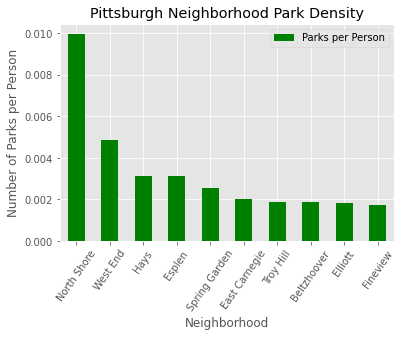

In [90]:
plt.style.use('ggplot')
parkCountPop[["Neighborhood","Parks per Person"]].head(10).plot.bar(rot=55, color = "Green",x='Neighborhood',y="Parks per Person")
plt.title("Pittsburgh Neighborhood Park Density")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Parks per Person")

Here are the top ten neighborhoods in parks per person. This means these neighborhoods have the most parks compared to their population, so there will be more parks per residence. Having more parks per person means there is more area reserved for outdoor spaces because of there is a higher density of parks when compared to the space that residences would take up. This contributes to the neighborhood having a higher quality environment.

# Combining the two density submetrics

In [91]:
parkCountArea = parkCountArea.sort_values('Neighborhood')
parkCountPop = parkCountPop.sort_values('Neighborhood')
mergedRanks = parkCountArea.merge(parkCountPop,left_on="Neighborhood",right_on="Neighborhood")
mergedRanks = mergedRanks[["Neighborhood","Rank_x","Rank_y"]]
mergedRanks = mergedRanks.rename(columns={"Rank_x":"Area Rank","Rank_y":"Population Rank"})
mergedRanks

,Neighborhood,Area Rank,Population Rank
0,Allegheny Center,6,12
1,Allentown,17,25
2,Banksville,55,47
3,Bedford Dwellings,22,33
4,Beechview,32,29
...,...,...,...
63,Upper Lawrenceville,10,17
64,West End,24,1
65,West Oakland,27,52
66,Westwood,43,38


In [92]:
mergedRanks["Average Rank"] = (mergedRanks["Area Rank"] + mergedRanks["Population Rank"]/5)/2
mergedRanks

,Neighborhood,Area Rank,Population Rank,Average Rank
0,Allegheny Center,6,12,4.2
1,Allentown,17,25,11.0
2,Banksville,55,47,32.2
3,Bedford Dwellings,22,33,14.3
4,Beechview,32,29,18.9
...,...,...,...,...
63,Upper Lawrenceville,10,17,6.7
64,West End,24,1,12.1
65,West Oakland,27,52,18.7
66,Westwood,43,38,25.3


When combining the ranks to an average rank, I weighted the Population Rank less by dividing it by 5. This is because density of parks per acre is a much better measurement of the quality of the environment compared to parks per person.

In [93]:
mergedRanks = mergedRanks.sort_values(by="Average Rank")
mergedRanks = mergedRanks[["Neighborhood","Average Rank"]]
print(mergedRanks[mergedRanks["Neighborhood"]=="Squirrel Hill South"].index.values)

[56]


Text(0, 0.5, 'Average Ranking')

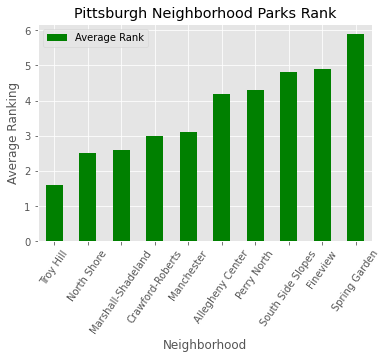

In [94]:
plt.style.use('ggplot')
mergedRanks[["Neighborhood","Average Rank"]].head(10).plot.bar(rot=55, color = "Green",x='Neighborhood',y="Average Rank")
plt.title("Pittsburgh Neighborhood Parks Rank")
plt.xlabel("Neighborhood")
plt.ylabel("Average Ranking")

This graph shows the average ranking of Pittsburgh neighborhoods between the metrics of parks per acre and parks per person. A lower ranking value is better because it means the neighborhood placed higher on the list.

# Conclusion

When considering the metric of both park density by area and by population, **East Liberty** has the highest parks ranking from my analysis.

However, it is important to note that there many flaws in this data and this analysis:
1. The parks dataset only contains 73 out of 90 Pittsburgh neighborhoods.
2. The final ranking list contains less neighborhoods, at 68.
3. There are only 153 usable entries in this dataset, spread across 73 neighborhoods, which means many neighborhoods end up with 1 or 2 parks, and thus are easily skewed.
4. The size, quality, and construction of the parks are important to consider. For example, Schenley Park is clearly a much better and more expansive park than something like Able Long Park, which is merely a playground. In order to combat this flaw, it would be necessary to consider each of the 153 parks individually, rate them, and then use that data in this analysis. However, that is obviously unfeasible and unsuited for the nature of this project.
5. The area density of the parks would make more sense if the areas of the parks were included, not just the quantity.

Personally, my favorite neighborhood in Pittsburgh would be Shadyside, but unfortunately it did not make the top ten in this metric.